In [1]:
import os
#os.chdir('..')
print("Current Working Directory " , os.getcwd())
import sys
sys.path.append("../") # Add directory containing src/data to path

Current Working Directory  /scratch/work/mohamma10/posterior-network/Posterior-Network/notebooks


In [2]:
import torch
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import matplotlib
from torch import nn

In [5]:
!pip install pyro-ppl

Defaulting to user installation because normal site-packages is not writeable
  Using cached pyro_ppl-1.9.1-py3-none-any.whl.metadata (7.8 kB)
  Using cached pyro_api-0.1.2-py3-none-any.whl.metadata (2.5 kB)
Using cached pyro_ppl-1.9.1-py3-none-any.whl (755 kB)
Using cached pyro_api-0.1.2-py3-none-any.whl (11 kB)


In [3]:
import pyro

In [4]:
from src.posterior_networks.run import run

In [6]:
from src.dataset_manager.ClassificationDataset import ClassificationDataset



## Parameters

In [5]:
# Dataset parameters
seed_dataset=123
directory_dataset='../data'
dataset_name='CIFAR10'
ood_dataset_names=['SVHN']
unscaled_ood=True
split=[.6, .8]
transform_min=0.
transform_max=255.

# Architecture parameters
seed_model=123
directory_model='../saved_models'
architecture='conv'
input_dims=[32, 32, 3]
output_dim=10
hidden_dims=[64, 64, 64]
kernel_dim=5
latent_dim=6
no_density=False
density_type='radial_flow'
n_density=6
k_lipschitz=None
budget_function='id'

# Training parameters
directory_results='../saved_results'
max_epochs=200
patience=10
frequency=2
batch_size=64
lr=5e-4
loss='UCE'
training_mode='joint'
regr=1e-5

## Testing

In [7]:
from src.dataset_manager.ClassificationDataset import ClassificationDataset

dataset = ClassificationDataset(f'{directory_dataset}/{dataset_name}.csv',
                                input_dims=input_dims, output_dim=output_dim,
                                transform_min=transform_min, transform_max=transform_max,
                                seed=seed_dataset)

/scratch/work/mohamma10/posterior-network/Posterior-Network/notebooks/../src/dataset_manager/ClassificationDataset.py:24: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  self.n_data = int(df.iloc[df.shape[0] - 3][1])


In [13]:
len(dataset)

60000

tensor([3])


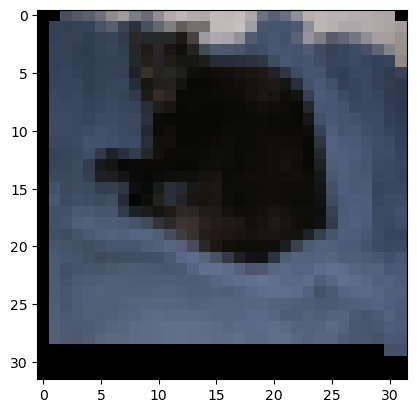

In [17]:
sample, label = dataset[23523]
sample = sample.permute((1, 2, 0))

print(label)
plt.imshow(sample)



## Training

In [5]:
results_metrics = run(# Dataset parameters
                        seed_dataset,  # Seed to shuffle dataset. int
                        directory_dataset,  # Path to dataset. string
                        dataset_name,  # Dataset name. string
                        ood_dataset_names,  # OOD dataset names.  list of strings
                        unscaled_ood,  # If true consider also unscaled versions of ood datasets. boolean
                        split,  # Split for train/val/test sets. list of floats
                        transform_min,  # Minimum value for rescaling input data. float
                        transform_max,  # Maximum value for rescaling input data. float

                        # Architecture parameters
                        seed_model,  # Seed to init model. int
                        directory_model,  # Path to save model. string
                        architecture,  # Encoder architecture name. string
                        input_dims,  # Input dimension. List of ints
                        output_dim,  # Output dimension. int
                        hidden_dims,  # Hidden dimensions. list of ints
                        kernel_dim,  # Input dimension. int
                        latent_dim,  # Latent dimension. int
                        no_density,  # Use density estimation or not. boolean
                        density_type,  # Density type. string
                        n_density,  # Number of density components. int
                        k_lipschitz,  # Lipschitz constant. float or None (if no lipschitz)
                        budget_function,  # Budget function name applied on class count. name

                        # Training parameters
                        directory_results,  # Path to save resutls. string
                        max_epochs,  # Maximum number of epochs for training
                        patience,  # Patience for early stopping. int
                        frequency,  # Frequency for early stopping test. int
                        batch_size,  # Batch size. int
                        lr,  # Learning rate. float
                        loss,  # Loss name. string
                        training_mode,  # 'joint' or 'sequential' training. string
                        regr)

/nfs/staff-hdd/charpent/anaconda3/envs/posterior-network/lib/python3.6/site-packages/torch/autograd/anomaly_mode.py:70: UserWarning: Anomaly Detection has been enabled. This mode will increase the runtime and should only be enabled for debugging.
  warnings.warn('Anomaly Detection has been enabled. '


Epoch 0 -> Val loss 2.431 | Val Acc.: 0.098
Model saved
Epoch 2 -> Val loss 1.874 | Val Acc.: 0.347
Model saved
Epoch 4 -> Val loss 1.453 | Val Acc.: 0.48
Model saved
Epoch 6 -> Val loss 1.428 | Val Acc.: 0.518
Model saved
Epoch 8 -> Val loss 1.127 | Val Acc.: 0.614
Model saved
Epoch 10 -> Val loss 1.168 | Val Acc.: 0.599
Epoch 12 -> Val loss 1.038 | Val Acc.: 0.637
Model saved
Epoch 14 -> Val loss 1.095 | Val Acc.: 0.617
Epoch 16 -> Val loss 0.961 | Val Acc.: 0.669
Model saved
Epoch 18 -> Val loss 1.082 | Val Acc.: 0.629
Epoch 20 -> Val loss 0.975 | Val Acc.: 0.666
Epoch 22 -> Val loss 1.024 | Val Acc.: 0.651
Epoch 24 -> Val loss 1.013 | Val Acc.: 0.655
Epoch 26 -> Val loss 0.897 | Val Acc.: 0.691
Model saved
Epoch 28 -> Val loss 0.907 | Val Acc.: 0.689
Epoch 30 -> Val loss 0.928 | Val Acc.: 0.683
Epoch 32 -> Val loss 1.003 | Val Acc.: 0.657
Epoch 34 -> Val loss 0.917 | Val Acc.: 0.689
Epoch 36 -> Val loss 0.835 | Val Acc.: 0.716
Model saved
Epoch 38 -> Val loss 0.895 | Val Acc.: 0.69

In [6]:
print(results_metrics['model_path'])
print(results_metrics['result_path'])

../saved_models/model-dpn-123-CIFAR10-[0.6, 0.8]-0.0-255.0-123-conv-[32, 32, 3]-10-[64, 64, 64]-5-6-False-radial_flow-6-None-id-200-10-2-64-0.0005-UCE-joint-1e-05
../saved_results/results-dpn-123-CIFAR10-[0.6, 0.8]-0.0-255.0-123-conv-[32, 32, 3]-10-[64, 64, 64]-5-6-False-radial_flow-6-None-id-200-10-2-64-0.0005-UCE-joint-1e-05


## Evaluation

In [7]:
no_show = ['model_path', 'result_path', 'train_losses', 'val_losses', 'test_losses', 'train_accuracies', 'val_accuracies', 'test_accuracies', 'fail_trace']
for k, v in results_metrics.items():
    if k not in no_show:
        print(k, v)

accuracy 0.7815
confidence_aleatoric 0.9511652701566718
confidence_epistemic 0.9483045595903589
brier_score 0.3477715262398235
anomaly_detection_aleatoric_SVHN 0.6917458075477938
anomaly_detection_epistemic_SVHN 0.6858745565869325
anomaly_detection_aleatoric_SVHN_unscaled 1.0
anomaly_detection_epistemic_SVHN_unscaled 1.0
